<a href="https://colab.research.google.com/github/A-Kirat/RNN-for-Sentiment-Analysis-in-IMDb-Reviews/blob/main/RNN_imdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Text(0.5, 1.0, 'Sentiment distribution')

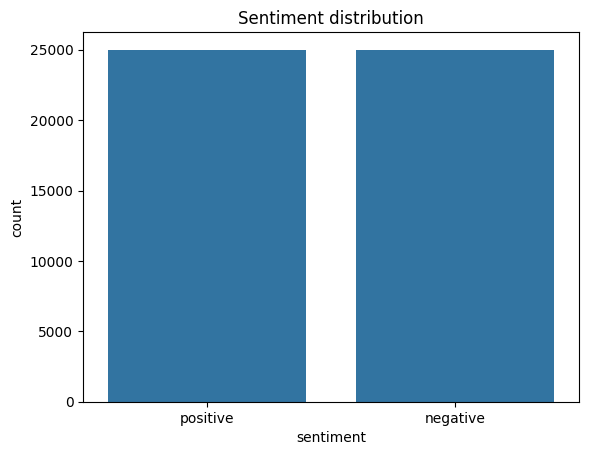

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [ ]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

<ipython-input-8-9f58b8f1475c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sentiment.replace("positive", 1, inplace=True)
<ipython-input-8-9f58b8f1475c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
df = df.drop_duplicates('review')

In [ ]:
df = df.dropna()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
# Load NLTK WordNet for lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
x = df['review'].astype(str)
y = df['sentiment']

In [ ]:
import re
import string
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove non-word characters and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercasing
    text = text.lower()
    # Tokenize the data
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Apply lemmatization and stemming
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [stemmer.stem(token) for token in tokens]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
preprocessed_x = x.apply(preprocess_text)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_x)
Xp_sequences = tokenizer.texts_to_sequences(preprocessed_x)

# Pad sequences to ensure uniform length
max_sequence_length = max([len(seq) for seq in Xp_sequences])
Xp_pad = pad_sequences(Xp_sequences, maxlen=max_sequence_length)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xp_pad, y_encoded, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,SimpleRNN,GRU

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))  # Adding a dense layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 1431s 5s/step - accuracy: 0.7269 - loss: 0.5219 - val_accuracy: 0.8706 - val_loss: 0.3425
Epoch 2/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 1494s 5s/step - accuracy: 0.9159 - loss: 0.2282 - val_accuracy: 0.8749 - val_loss: 0.3136
Epoch 3/5
154/310 ━━━━━━━━━━━━━━━━━━━━ 11:18 4s/step - accuracy: 0.9472 - loss: 0.1531

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, np.array(y_test))
print(f"Test Accuracy: {test_accuracy:.2f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8508 - loss: 0.5227
Test Accuracy: 0.84


In [ ]:
model1 = Sequential()

model1.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_sequence_length))

model1.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))


model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model1.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 311ms/step - accuracy: 0.5030 - loss: 0.7248 - val_accuracy: 0.4498 - val_loss: 0.7013
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - accuracy: 0.4997 - loss: 0.7035 - val_accuracy: 0.5080 - val_loss: 0.6934
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.5268 - loss: 0.6891 - val_accuracy: 0.5261 - val_loss: 0.6918
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 266ms/step - accuracy: 0.5319 - loss: 0.6928 - val_accuracy: 0.5201 - val_loss: 0.7013
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - accuracy: 0.5838 - loss: 0.6763 - val_accuracy: 0.5221 - val_loss: 0.6963


In [ ]:
test_loss, test_accuracy = model1.evaluate(X_test, np.array(y_test))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5047 - loss: 0.7033


In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_sequence_length))
model2.add(GRU(100, dropout=0.2, recurrent_dropout=0.0))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model2.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 820ms/step - accuracy: 0.4916 - loss: 0.6928 - val_accuracy: 0.6044 - val_loss: 0.6878
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 803ms/step - accuracy: 0.7733 - loss: 0.6693 - val_accuracy: 0.6426 - val_loss: 0.6395
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 871ms/step - accuracy: 0.8610 - loss: 0.4428 - val_accuracy: 0.7410 - val_loss: 0.5212
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 891ms/step - accuracy: 0.9712 - loss: 0.1213 - val_accuracy: 0.7510 - val_loss: 0.6590
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 945ms/step - accuracy: 0.9922 - loss: 0.0301 - val_accuracy: 0.7751 - val_loss: 0.7997


In [ ]:
test_loss, test_accuracy = model2.evaluate(X_test, np.array(y_test))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5228 - loss: 0.6929
